***
3/19
### 이미지에서의 텐서
- 이미지는 픽셀 값의 배열로 자연스럽게 표현
- 그레이 스케일 이미지는 2차원 배열로 볼 수 있으며, 텐서의 원소들의 각 값은 픽셀 강도에 해당
- 일반적으로 RGB 형식으로 표현되는 컬러 이미지는 3차원 배열로 생각할 수 있음
- 여기서 수치는 이미지의 높이, 너비 및 색상 채널에 해당
- 예를 들어, 텐서플로에서는 다음의 배열이 텐서가 됨
  - 256 x 256 사이즈의 그레이 스케일 이미지는(256,256) 모앙의 텐서가 됨

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
url = 'https://cobslab.com/wp-content/uploads/2022/02/ai-009-1.jpg'
import tensorflow as tf
image_path = tf.keras.utils.get_file(fname='image.jpg', origin = url, cache_dir='/content/')

116520/116520 ━━━━━━━━━━━━━━━━━━━━ 1s 5us/step


In [ ]:
image = tf.image.decode_jpeg(tf.io.read_file(image_path))
image

<tf.Tensor: shape=(952, 1048, 3), dtype=uint8, numpy=
array([[[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       ...,

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]]], dtype=uint8)>

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()

# Tensor를 넘파이로 변환해서 cv2_imshow로 출력 가능
cv2_imshow(image.numpy())

swap_color = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2BGR)
cv2_imshow(swap_color)

Output hidden; open in https://colab.research.google.com to view.

- tf.random.uniform 함수를 호출하여 [100, 100, 3] 모양의 랜덤 텐서를 생성
- 이 모양은 3개의 색상 채널(RGB)이 있는 100 x 100 픽셀 이미지에 해당
- 매개면수 maxval = 255를 사용하면 각 채널에 대해 생성된 임의의 값이 RGB 이미지의 8비트 색상 표현에 일반적으로 사용되는 [0, 255] 범위에 속하도록 할 수 있음.

In [ ]:
# 샘플 RGB 이미지
rgb_image = tf.random.uniform(([100, 100, 3]), maxval=255, dtype=tf.float32)
print(rgb_image)

tf.Tensor(
[[[ 44.453876  253.07596   144.25543  ]
  [ 90.49169    15.210067  100.439705 ]
  [135.40671   181.424     118.172264 ]
  ...
  [195.20996   214.50958    64.456215 ]
  [ 91.71267    21.722614  112.228226 ]
  [  7.933275   10.945601  115.28578  ]]

 [[ 50.588966  199.2638     37.498516 ]
  [ 60.989525   28.70445   166.57655  ]
  [125.3964    171.62901   120.15606  ]
  ...
  [ 42.301853  238.39076    15.070265 ]
  [209.06087   205.99814   160.2723   ]
  [ 46.71275    58.867233  240.57947  ]]

 [[ 14.017296  178.1073     82.15725  ]
  [107.94907    58.974415  253.7501   ]
  [234.10124    64.17053    55.560863 ]
  ...
  [100.16661   119.33552   213.47629  ]
  [251.24768   247.94315    24.02365  ]
  [232.38286   240.3355    104.77998  ]]

 ...

 [[ 87.12674     6.437949  238.5048   ]
  [ 90.91623    84.884285    9.552261 ]
  [202.35222    28.375084   81.34111  ]
  ...
  [ 83.22119   205.66821     1.3983554]
  [ 39.92537    42.092834   63.363483 ]
  [124.067444  235.61447   239.73

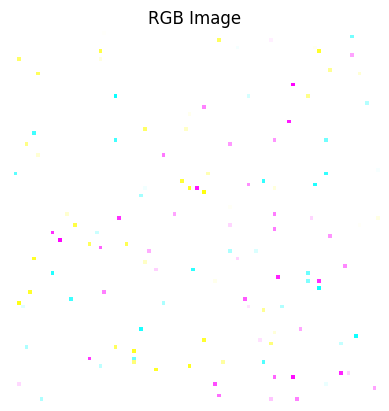

In [ ]:
# 무작위 색상 값의 모음
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')
plt.show()

tf.image.rgb_to_grayscale
- 텐서플로의 rgb_to_grayscale 기능을 활용하여 쉽게 RGB 이미지를 그레이 스케일로 바꿀 수 있음

tf.Tensor(
[[[178.28796 ]
  [ 47.426403]
  [160.44058 ]
  ...
  [191.61339 ]
  [ 52.95811 ]
  [ 21.938904]]

 [[136.36372 ]
  [ 54.069008]
  [151.925   ]
  ...
  [154.29742 ]
  [201.68025 ]
  [ 75.943565]]

 [[118.10468 ]
  [ 95.81147 ]
  [113.9749  ]
  ...
  [124.32604 ]
  [223.37926 ]
  [222.48108 ]]

 ...

 [[ 57.010807]
  [ 78.0909  ]
  [ 86.41214 ]
  ...
  [145.76146 ]
  [ 43.865627]
  [202.71912 ]]

 [[165.42422 ]
  [195.88501 ]
  [129.53723 ]
  ...
  [129.66211 ]
  [ 59.01741 ]
  [100.95546 ]]

 [[ 65.32237 ]
  [104.649605]
  [120.713974]
  ...
  [144.56912 ]
  [171.30234 ]
  [110.614044]]], shape=(100, 100, 1), dtype=float32)


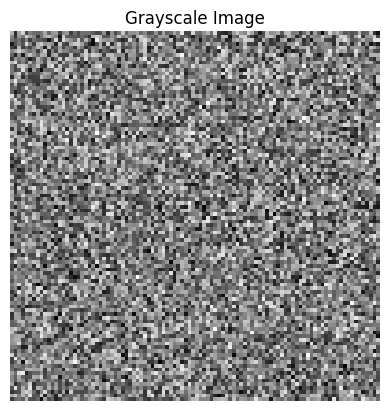

In [ ]:
grayscale_image = tf.image.rgb_to_grayscale(rgb_image)
print(grayscale_image)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

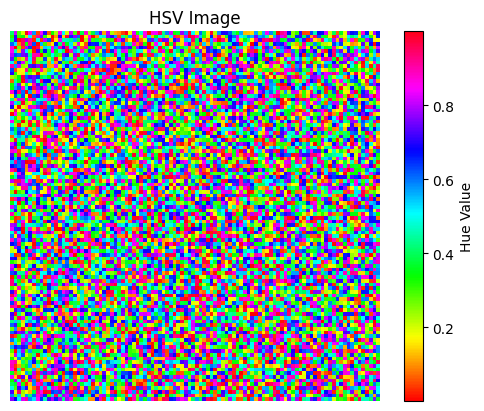

In [ ]:
hsv_image = tf.image.rgb_to_hsv(rgb_image)
hue_channel = hsv_image[:, :, 0]
plt.imshow(hue_channel, cmap='hsv')
plt.title('HSV Image')
plt.axis('off')
plt.colorbar(label='Hue Value')
plt.show()

#### 픽셀 값의 정규화와 표준화
- 이미지를 처리할 때 픽셀 값의 사이즈를 조정하는 방식은 모델의 성능과 수렴 속도 모두에 많은 영향을 미칠 수 있음
- 픽셀 값의 사이즈를 조정하는 데 사용되는 두 가지 일반적인 방법은 정규화와 표준화

**정규화**
- 정규화는 일반적으로 픽셀 값을 [0, 1] 범위로 스케일링
- 픽셀 값이 0에서 255사이인 8비트 이미지의 경우, 각 픽셀을 255로 나누기만 하면 정규화 완료

**표준화**
- 이미지의 픽셀 값을 평균 0, 표준 편차 1이 되도록 스케일링 하는 과정
- 표준화는 최적화 환경을 좀 더 균일하게 만들어 학습 과정을 가속화 할 수 있으므로 많은 머신러닝 알고리즘에서 중요한 전처리 단계
- 이미지의 경우 픽셀 값은 일반적으로 [0, 255] 범위에 있음


### 이미지 필터링
- 필터는 이미지를 텐서로 변환하고 거대한 텐서 위에서 좌측 상단부터 우측 하단으로 이동하며 연산을 진행
- 이때 연산 방식에 따라 크게 선형 필터와 비선형 필터로 나뉨
- 이미지 필터에 대한 깊은 이해를 위해 선형 필터와 비선형 필터의 기본 특성과 처리된 이미지에 어떤 영향을 미치는지 아는 것이 중요

#### 선형 필터
- 선형 시프트 불변 시스템이라고도 하는 선형 필터는 출력이 입력 값의 선형 조합이라는 간단한 원리를 가지고 있음
- 선형 필터는 항상 고정되고 예측 가능한 방식으로 픽셀 값을 결합

#### 비선형 필터
- 단순히 입력 이미지 픽셀의 가중치 합이 아니며, 출력은 입력 값의 순위/순서 또는 기타 비선형 연산에 따라 달라짐
- 고정된 방식으로 값을 결합하는 것이 아닌 특정 조건이나 규칙에 따라 값을 선택하거나 변경 가능

#### 중앙 값 필터링
- 비선형 디지털 필터링 기법
- 주요 목적은 노이즈 감소, 특히 이미지에서 드물게 발생하는 흰색과 검은색 픽셀로 나타나는 소금과 후추 노이즈를 줄이는 것

In [ ]:
import numpy as np
import cv2

def generate_salt_noise(image):
  num_salt = np.ceil(0.05 * image.size) # 값을 올림
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
  # 임의의 좌표에 하얀색 점을 뿌림
  salted_image = image.copy()
  salted_image[coords[0], coords[1]] = 255
  return salted_image

def generate_pepper_noise(image):
  num_pepper = np.ceil(0.05 * image.size)
  coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
  # 임의의 좌표에 검은색 점을 뿌림
  peppered_image = image.copy()
  peppered_image[coords[0], coords[1]] = 0
  return peppered_image

--2025-03-19 05:24:54--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1462729 (1.4M) [image/png]
Saving to: ‘like_lenna.png.1’

like_lenna.png.1    100%[===================>]   1.39M  --.-KB/s    in 0.01s   

2025-03-19 05:24:55 (119 MB/s) - ‘like_lenna.png.1’ saved [1462729/1462729]



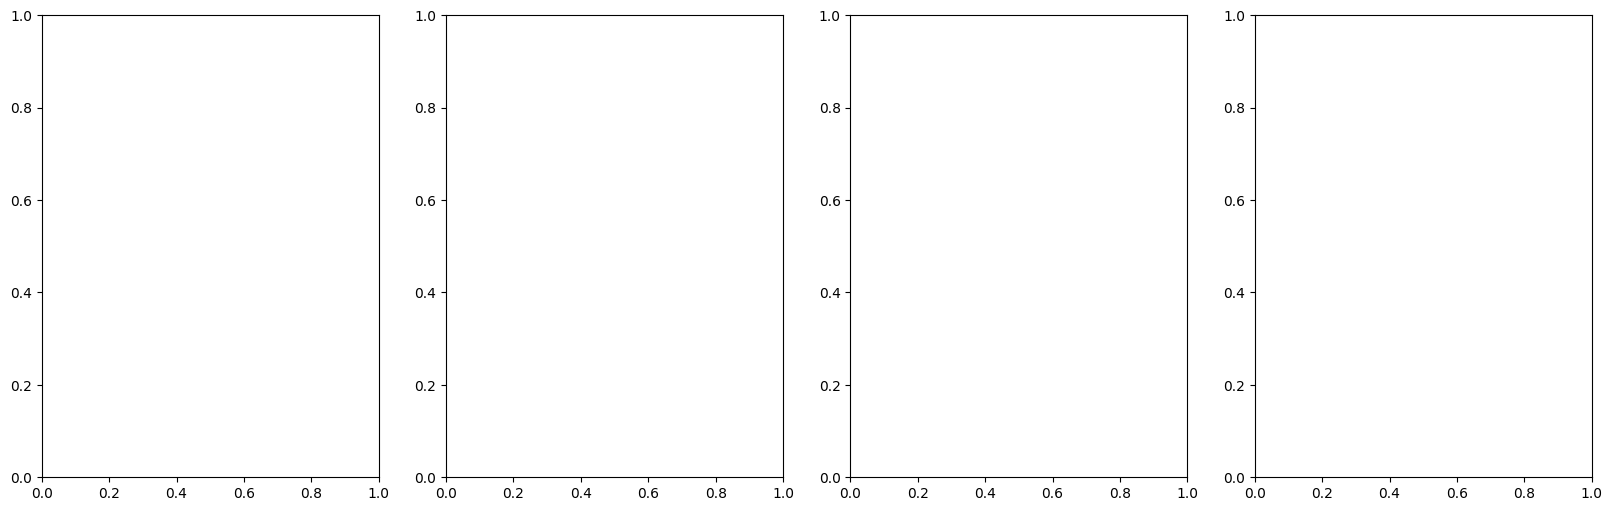

In [ ]:
!wget https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png

lenna_image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)
salted_lenna = generate_salt_noise(lenna_image)
peppered_lenna = generate_pepper_noise(lenna_image)
filtered_lenna = cv2.medianBlur(lenna_image, 5)

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

In [ ]:
import matplotlib.pyplot as plt
axes[0].imshow(lenna_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(salted_lenna, cmap='gray')
axes[1].set_title('Salted Image')
axes[1].axis('off')

axes[2].imshow(peppered_lenna, cmap='gray')
axes[2].set_title('Peppered Image')
axes[2].axis('off')

axes[3].imshow(filtered_lenna, cmap='gray')
axes[3].set_title('Filtered Image')
axes[3].axis('off')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

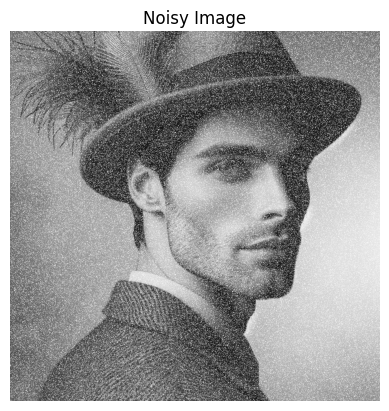

In [ ]:
image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)
mean = 0
sigma = 1
gaussian_noise = np.random.normal(mean, sigma, image.shape).astype('uint8')
noisy_image = cv2.add(image, gaussian_noise)

plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.show()

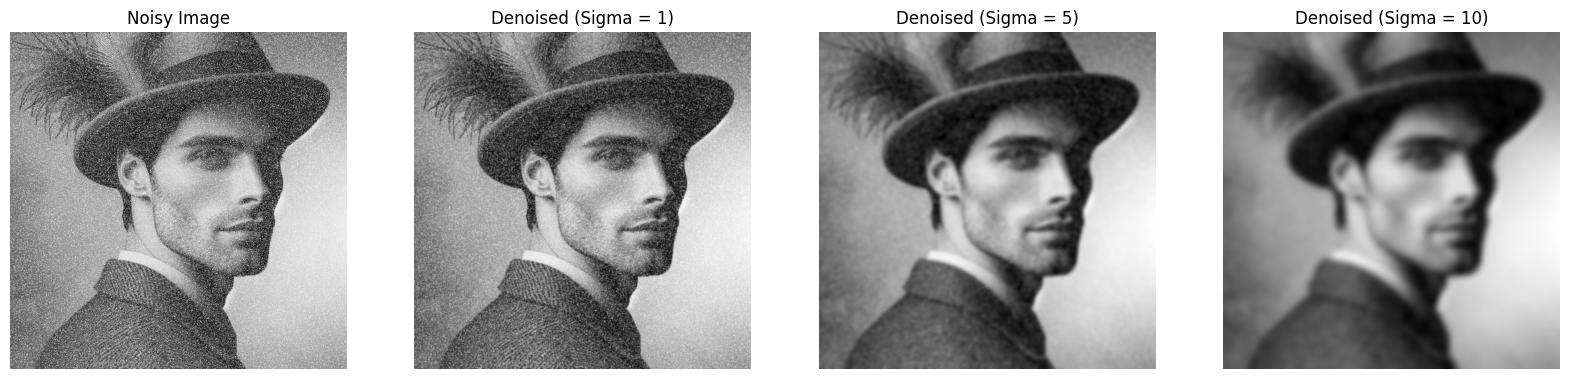

In [ ]:
sigma_values = [1, 5, 10]
denoised_images = []
for sigma in sigma_values:
  denoised_image = cv2.GaussianBlur(noisy_image, (0, 0), sigma)
  denoised_images.append(denoised_image)

fig, axes = plt.subplots(1, 4, figsize=(20, 10))

axes[0].imshow(noisy_image, cmap='gray')
axes[0].set_title('Noisy Image')
axes[0].axis('off')

for ax, img, sigma in zip(axes[1:], denoised_images, sigma_values):
  ax.imshow(img, cmap='gray')
  ax.set_title(f'Denoised (Sigma = {sigma})')
  ax.axis('off')

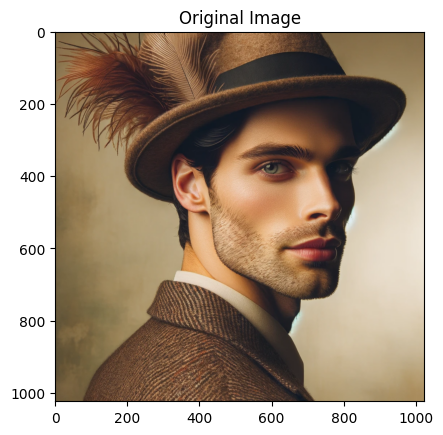

In [ ]:
image_path = "like_lenna.png"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
plt.show()

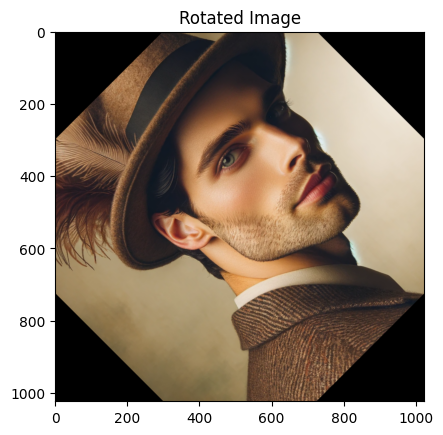

In [ ]:
def rotate_image(image, angle, center=None):
  rows, cols, _ = image.shape
  if center is None:
    center = (cols // 2, rows // 2)
  M = cv2.getRotationMatrix2D(center, angle, 1)
  rotated_image = cv2.warpAffine(image, M, (cols, rows))
  return rotated_image

rotated_img = rotate_image(img, 45)
plt.imshow(rotated_img)
plt.title('Rotated Image')
plt.show()

### 이미지 변환
#### 원근 변환
- 한 이미지의 점을 다른 이미지의 점으로 매핑하는 기하학적 변환의 일종
- 원근 투영으로 인한 이미지 왜곡과 같은 이미지의 왜곡을 보정하는데 사용
- 호모그래피 행렬을 사용
- 소스 이미지의 점 4개와 대상 이미지의 점 4개를 사용하여 계산

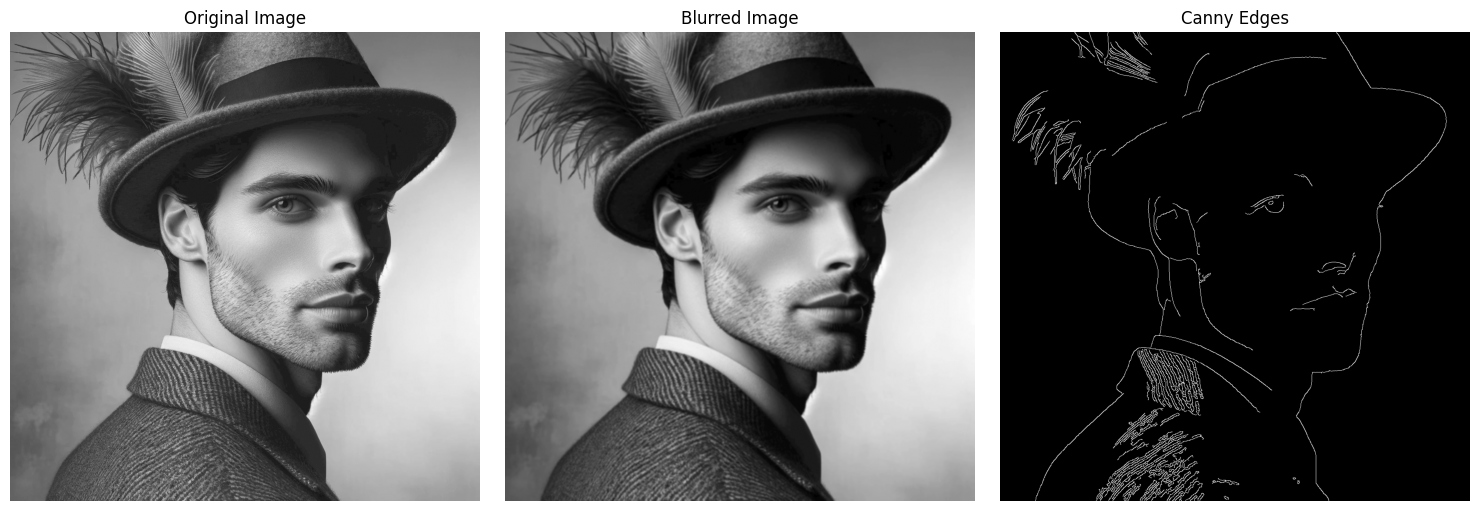

In [35]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("like_lenna.png", cv2.IMREAD_GRAYSCALE)
# 1. 가우시안 블러 적용
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# 2. Canny 에지 검출 적용
canny_edges = cv2.Canny(blurred_image, threshold1 = 50, threshold2 = 200)

# 3. 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title('Blurred Image')
axes[1].axis('off')

axes[2].imshow(canny_edges, cmap='gray')
axes[2].set_title('Canny Edges')
axes[2].axis('off')

plt.tight_layout()
plt.show()